In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [37]:
df = pd.read_csv("HARGA-RUMAH-JAKSEL.csv")

In [38]:
df.head(10)

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
5,10000000000,460,300,4,4,ADA,JAKSEL
6,7600000000,278,350,4,4,ADA,JAKSEL
7,5250000000,511,300,3,2,ADA,JAKSEL
8,670000000,70,69,3,2,TIDAK ADA,JAKSEL
9,480000000,66,42,2,1,TIDAK ADA,JAKSEL


In [39]:
df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


In [40]:
cdf = df[['HARGA','LT']]

In [41]:
cdf.head()

,HARGA,LT
0,28000000000,1100
1,19000000000,824
2,4700000000,500
3,4900000000,251
4,28000000000,1340


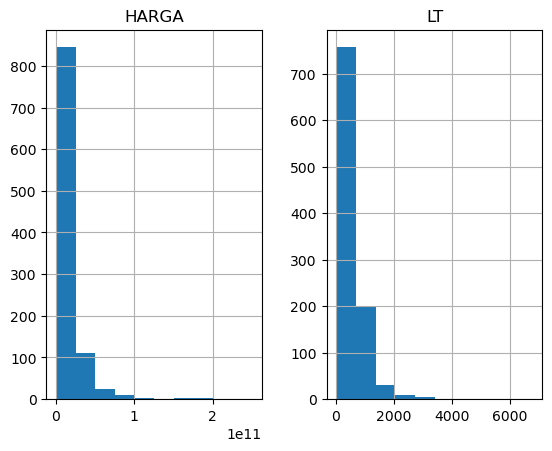

In [42]:
cdf.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

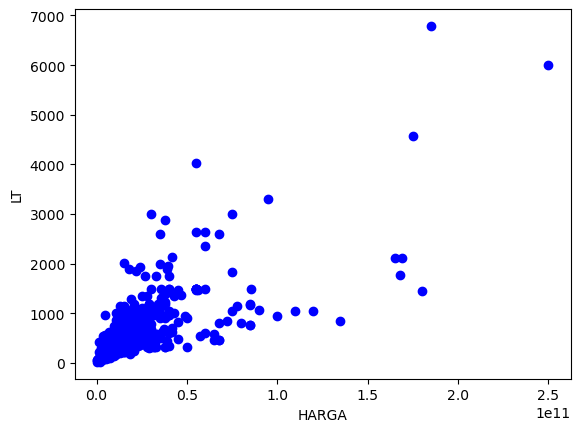

In [43]:
plt.scatter(cdf.HARGA, cdf.LT, color='blue')
plt.xlabel('HARGA')
plt.ylabel('LT')
plt.show

In [44]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<function matplotlib.pyplot.show(close=None, block=None)>

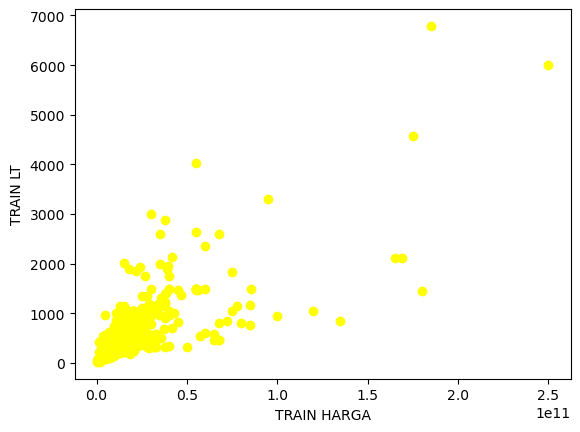

In [45]:
plt.scatter(train.HARGA, train.LT, color='yellow')
plt.xlabel('TRAIN HARGA')
plt.ylabel('TRAIN LT')
plt.show

In [46]:
from sklearn import linear_model
regresi = linear_model.LinearRegression()
train_x = np.asanyarray(train[['HARGA']])
train_y = np.asanyarray(train[['LT']])
regresi.fit(train_x, train_y)

print('Koefisien : ', regresi.coef_)
print('Intercept : ', regresi.intercept_)

Koefisien :  [[1.9753382e-08]]
Intercept :  [188.43427977]


<function matplotlib.pyplot.show(close=None, block=None)>

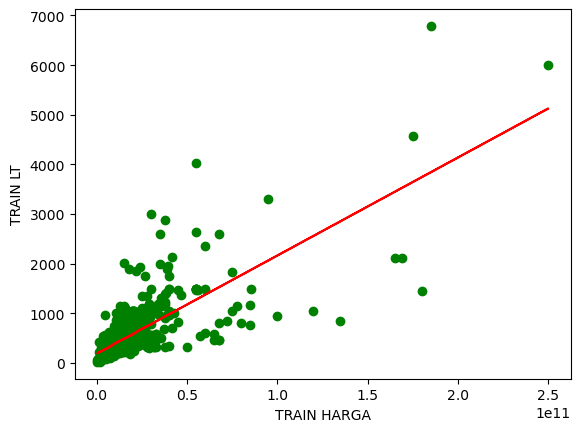

In [47]:
plt.scatter(train.HARGA, train.LT, color='green')
plt.plot(train_x,regresi.coef_[0][0]*train_x + regresi.intercept_[0], '-r')
plt.xlabel('TRAIN HARGA')
plt.ylabel('TRAIN LT')
plt.show

In [48]:
test_x = np.asanyarray(test[['HARGA']])
test_y = np.asanyarray(test[['LT']])

In [49]:
test_y = regresi.predict(test_x)

In [50]:
test_y

array([[ 197.91590312],
       [ 356.33802669],
       [ 376.09140868],
       [ 303.00389531],
       [ 879.80264944],
       [ 464.98162764],
       [ 316.83126271],
       [ 958.8161774 ],
       [ 287.20118972],
       [ 346.46133569],
       [ 534.1184646 ],
       [ 534.1184646 ],
       [ 642.76206555],
       [ 543.9951556 ],
       [ 385.96809967],
       [ 682.26882953],
       [ 899.55603143],
       [ 514.36508261],
       [ 498.56237702],
       [ 346.46133569],
       [ 257.57111674],
       [ 435.35155465],
       [ 346.46133569],
       [ 297.07788072],
       [ 603.25530157],
       [ 499.55004612],
       [ 569.67455219],
       [ 642.76206555],
       [1274.87028925],
       [ 346.46133569],
       [ 484.73500963],
       [ 603.25530157],
       [ 346.46133569],
       [ 484.73500963],
       [ 260.53412403],
       [ 543.9951556 ],
       [ 277.32449873],
       [ 484.73500963],
       [ 561.77319939],
       [ 621.03334536],
       [ 534.1184646 ],
       [ 267.447

In [53]:
prediksi_y = regresi.predict([[735]])
prediksi_y

array([[188.43429429]])

In [52]:
MAE = np.mean(np.absolute(prediksi_y - test_y))
print("Nilai Mean Absolute Error : ", MAE)
akurasi = 100 - MAE
print("Nilai Akurasi : ", akurasi)

Nilai Mean Absolute Error :  352.48883770591715
Nilai Akurasi :  -252.48883770591715
